In [1]:
import torch
import torchvision
import numpy as np
import cv2
import argparse
from PIL import Image
from torchvision.transforms import transforms as transforms
import os
from pathlib import Path
import matplotlib.pyplot as plt

#Very hacky fix to make matplotlib work on my pc
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # Error #15: Initializing libiomp5md.dll, but found libiomp5md.dll already initialized.

repo_dir = "c:/Users/James/git/3dGolfPoseDetection/"
save_dir = repo_dir + "/dev-nbs/saved-labels/"

#labelled images:  1 ['1_462-512-681-745-422-472-721-785_.png']


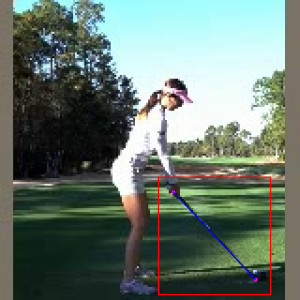

In [2]:
def label_img(img, club_coordinates, box_cords):
    grip, club = club_coordinates
    labelled = img.copy()
    cv2.circle(labelled, grip, 5, (255,0,255), -1)
    cv2.circle(labelled, club, 5, (255,0,255), -1)
    cv2.line(labelled, club, grip, (255, 0, 0), 2)
    cv2.rectangle(labelled, box_cords[0], box_cords[1], (0, 0, 255), 2)
    return labelled


labelled_filenames = os.listdir(save_dir)
print("#labelled images: ", len(labelled_filenames), labelled_filenames[:2])
filename = labelled_filenames[0]
img = cv2.imread(save_dir+filename)

all_cords = [int(x) for x in filename.split("_")[1].split("-")]
grip, club, box_cords = all_cords[:2], all_cords[2:4], [all_cords[4:6], all_cords[6:]]

labelled_img = label_img(img, [grip, club], box_cords)

rescale_height = 300
h, w = labelled_img.shape[:2]
r = rescale_height / float(h)
dim = (int(w * r), rescale_height)
labelled_resized_img = cv2.resize(labelled_img, dim, interpolation = cv2.INTER_AREA)
Image.fromarray(labelled_resized_img[:,:,::-1])